In [1]:
from recast import CPT
import numpy as np

# Croatian site 

In [6]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500 # m
layout.AVERAGE_RANGE = 4000
layout.set_path('/Users/niva/Desktop/recast-test', 
                path_type = 'output')

# setting path to the landcover data 
layout.set_path('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif', 
                path_type = 'landcover')

layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7

points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])

layout.add_measurement_instances(points = points, points_id = 'initial')
layout.generate_mesh()


Path /Users/niva/Desktop/recast-test set for storing CPT outputs
Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif set for landcover data
Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


In [7]:
layout.optimize_measurements()

Correct latitudinal zone!
Correct longitudinal zone!
Optimizing initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


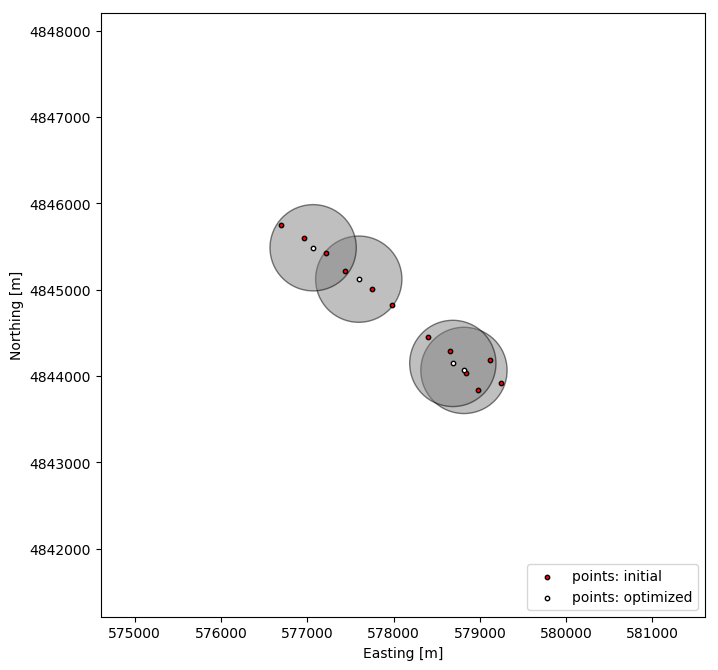

In [8]:
layout.plot_optimization()

In [9]:
layout.generate_combined_layer(points_id = 'initial')

Generating combined layer for initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


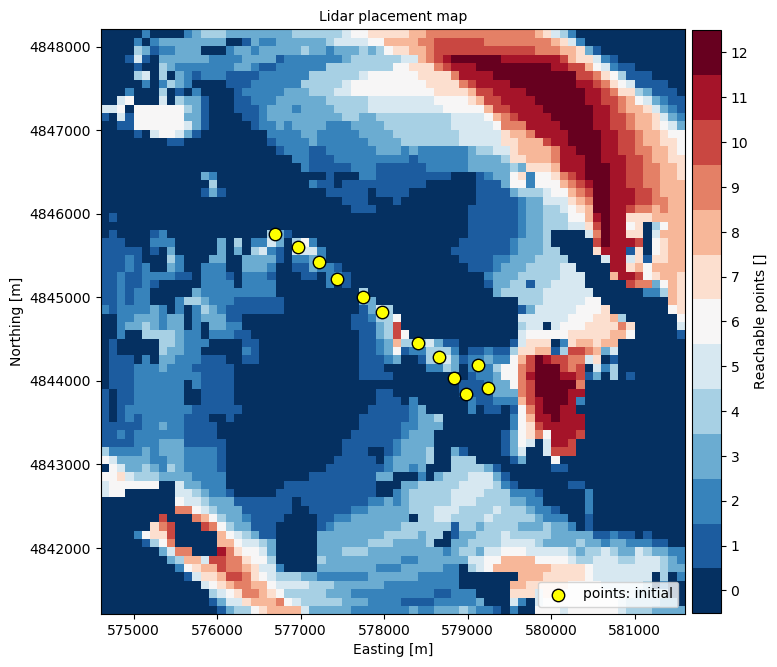

In [10]:
layout.plot_layer(layout.layer_selector('combined'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [11]:
layout.add_lidar_instance(position = np.array([580800 - 1800,4845300 + 2500, 271]), lidar_id = 'koshava')

Lidar 'koshava' added to the lidar dictionary, which now contains 1 lidar instance(s).


In [12]:
layout.lidar_dictionary

{'koshava': {'position': array([ 579000, 4847800,     271]),
  'lidar_inside_mesh': False,
  'measurement_id': None,
  'measurement_points': None,
  'reachable_points': None,
  'trajectory': None,
  'probing_coordinates': None,
  'emission_config': None,
  'motion_config': None,
  'acqusition_config': None,
  'data_config': None}}

In [13]:
layout.measurements_dictionary['initial']

,Point no.,Easting [m],Northing [m],Height asl [m]
0,1,576697.34,4845753.0,475.0
1,2,576968.00,4845595.0,519.0
2,3,577215.00,4845425.0,503.0
3,4,577439.00,4845219.0,510.0
4,5,577752.00,4845005.0,526.0
5,6,577979.00,4844819.0,558.0
6,7,578400.00,4844449.0,533.0
7,8,578658.00,4844287.0,530.0
8,9,578838.00,4844034.0,510.0
9,10,578974.00,4843842.0,497.0


In [14]:
layout.update_lidar_instance(lidar_id= 'koshava', points_type = 'initial')

Either the points_id was not provided or no points exists for the given points_id!
Halting the current operation!


In [15]:
layout.lidar_dictionary['koshava']['motion_config']